<a href="https://colab.research.google.com/github/yuliatereshko/my_first_code/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_%22hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

<Axes: >

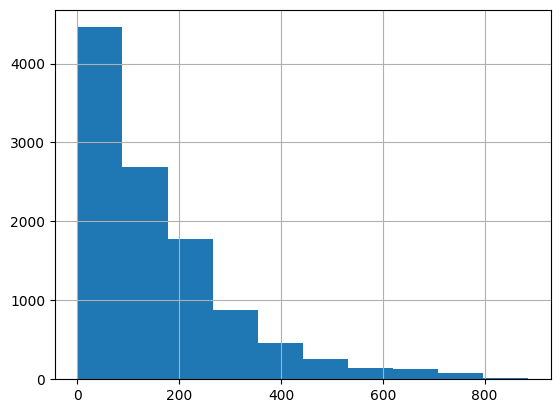

In [133]:
df['registered'].hist()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

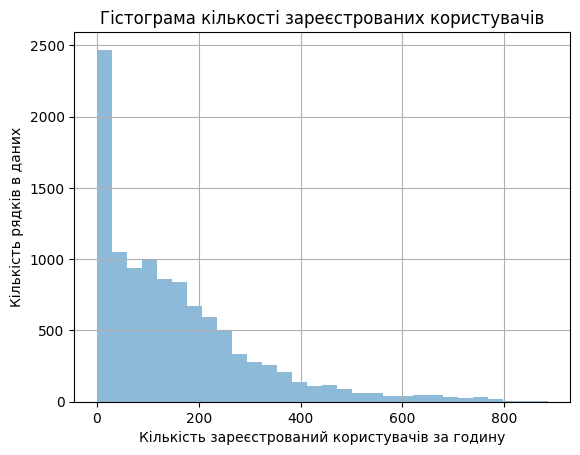

In [134]:
df['registered'].hist(bins = 30, alpha=.5)
plt.ylabel('Кількість рядків в даних')
plt.xlabel('Кількість зареєстрований користувачів за годину')
plt.title('Гістограма кількості зареєстрованих користувачів');

З даної гісторгами бачимо, що кількість зареєстрованих користувачів за годину загалом знаходиться в проміжку від 0 до 800. І, чим більша кількість зареєстрованих користувачів за годину - тим менше таких значень зустрічається в таблиці. На перший погляд виглядає так, що загалом користувачів не багато, але я б не робила поспішних висновків для прийняття якихось рішень. Адже 800 зареєстрованих користувачів за 1 годину це дійсно багато і зрозуміло, що в звичайний час їх буде менше. Більш показовими можуть бути значення за день. Також, цікаво виявити в які самі години і дні спостерігається максимум реєстрацій.
Звісно, варто звернути увагу на перший стопвець гістограми, який показує, що найбільше годин таких, де кількість реєстрацій найменша і дослідити детальніше: в який час найменше реєструються, як можна це покращити.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [135]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [136]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [137]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [138]:
no_customers_days = df[df['registered'] == 0]
grouped = no_customers_days.groupby('dayofweek').size()

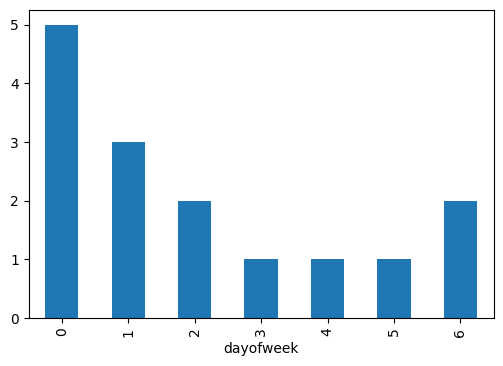

In [139]:
grouped.plot.bar(figsize=(6, 4));

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

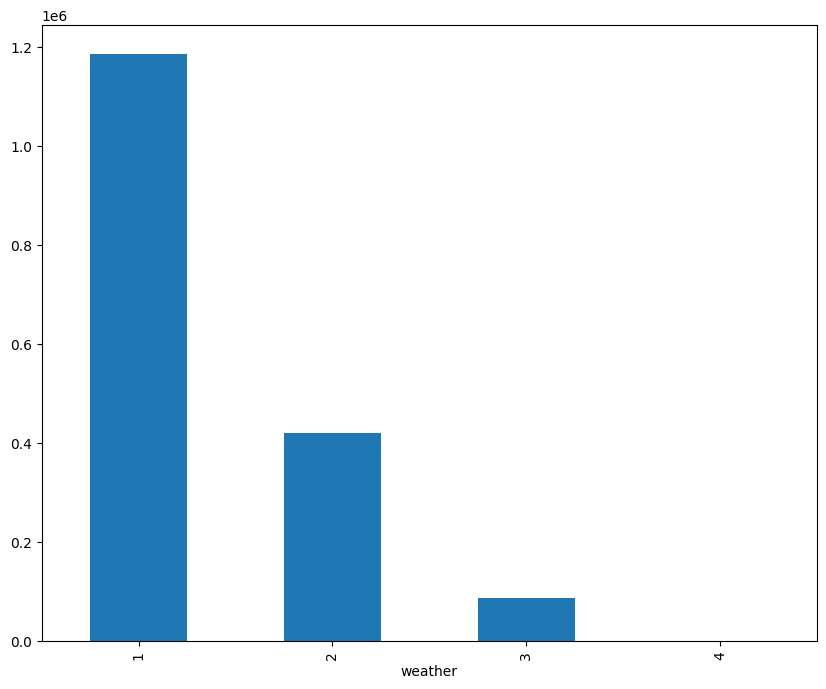

In [140]:
weather_groups = df.groupby('weather')
clients_by_weather = weather_groups.registered.sum()
clients_by_weather.plot.bar(figsize=(10, 8));

In [141]:
clients_by_weather

,registered
weather,
1,1186163
2,419914
3,87106
4,158


На жаль, не змогла налаштувати коректну шкалу для відображення кількості зареєстрованих користувачів, тому вивела табличку з цими значеннями. З графіку видно, що кількість зареєстрованих користувачів прямо залежить від погодних умов: коли погода гарна, користувачів більше. А в найгірших погодних умовах їх майже немає, з таблички видно, що таких було 158, але як бачимо на графіку, в масштабах всіх користувачів це майже 0.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

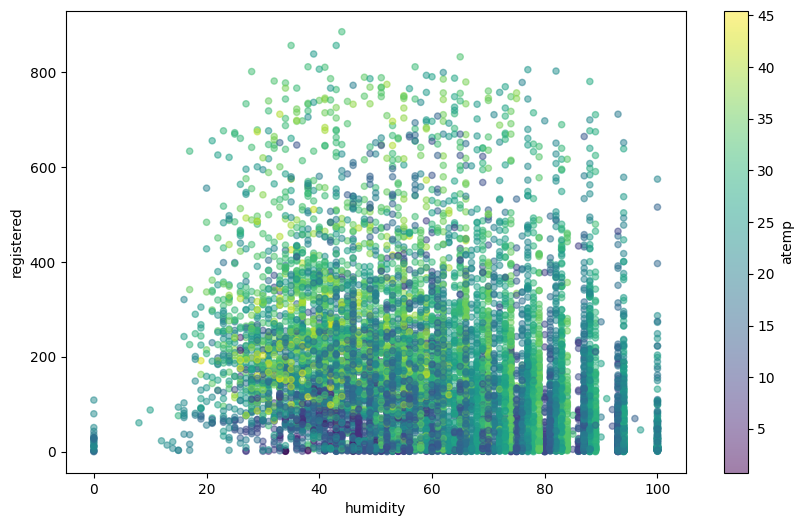

In [144]:
ax = df.plot.scatter(x='humidity', y='registered', alpha=0.5, c='atemp', figsize=(10, 6))

plt.xlabel('humidity')
plt.ylabel('registered');

З даного графіку бачимо, що найбільше користувачів реєструється при середній вологості та теплішій температурі. Надто суха(менше 20%) та надто волога (більше 90%) не є дуже привабливою для користувачів. Також, на графіку є невелика кількість зареєстрованих в дощ і при вологості 0% (хоча такої не існує в звичайних умовах, тому тут варто перевірити дані). Що ми, власне, і зробимо:

In [152]:
low_humidity = df[df['humidity'] == 0]
low_humidity

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,3
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,3
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,3
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37,3
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44,3
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24,3
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17,3
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11,3


Як бачимо, таких записів небагато, всі вони за один день і погода тут оцінена переважно як 3, тобто "Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари". Як при снігу/дощі/грозі вологість може бути 0, загадка))

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)